In [37]:
library(ISLR)
library(ggplot2)
library(rpart)				        # Popular decision tree algorithm
library(rattle)					# Fancy tree plot
library(rpart.plot)				# Enhanced tree plots
library(RColorBrewer)				# Color selection for fancy tree plot
library(party)					# Alternative decision tree algorithm
library(partykit)				# Convert rpart object to BinaryTree
library(caret)
library(randomForest)


In [17]:
setwd("C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data")
df1 = read.csv("Churn.csv")
head(df1)
names(df1)

Account.Length,VMail.Message,Day.Mins,Eve.Mins,Night.Mins,Intl.Mins,CustServ.Calls,Churn,Intl.Plan,VMail.Plan,...,Day.Charge,Eve.Calls,Eve.Charge,Night.Calls,Night.Charge,Intl.Calls,Intl.Charge,State,Area.Code,Phone
128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
118,0,223.4,220.6,203.9,6.3,0,0,1,0,...,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027


[1] "Account.Length" "VMail.Message"  "Day.Mins"       "Eve.Mins"      
 [5] "Night.Mins"     "Intl.Mins"      "CustServ.Calls" "Churn"         
 [9] "Intl.Plan"      "VMail.Plan"     "Day.Calls"      "Day.Charge"    
[13] "Eve.Calls"      "Eve.Charge"     "Night.Calls"    "Night.Charge"  
[17] "Intl.Calls"     "Intl.Charge"    "State"          "Area.Code"     
[21] "Phone"

In [18]:
df1 = df1[,-c(19:21)]

In [19]:

df1$Churn = ifelse(df1$Churn == 1, "Yes", "No")

In [20]:
prop.table(table(df1$Churn))
table(df1$Churn)


       No       Yes 
0.8550855 0.1449145 


  No  Yes 
2850  483 

In [22]:
set.seed(1234)

ids = sample(nrow(df1), nrow(df1)*0.8)

train = df1[ids,]
test = df1[-ids,]

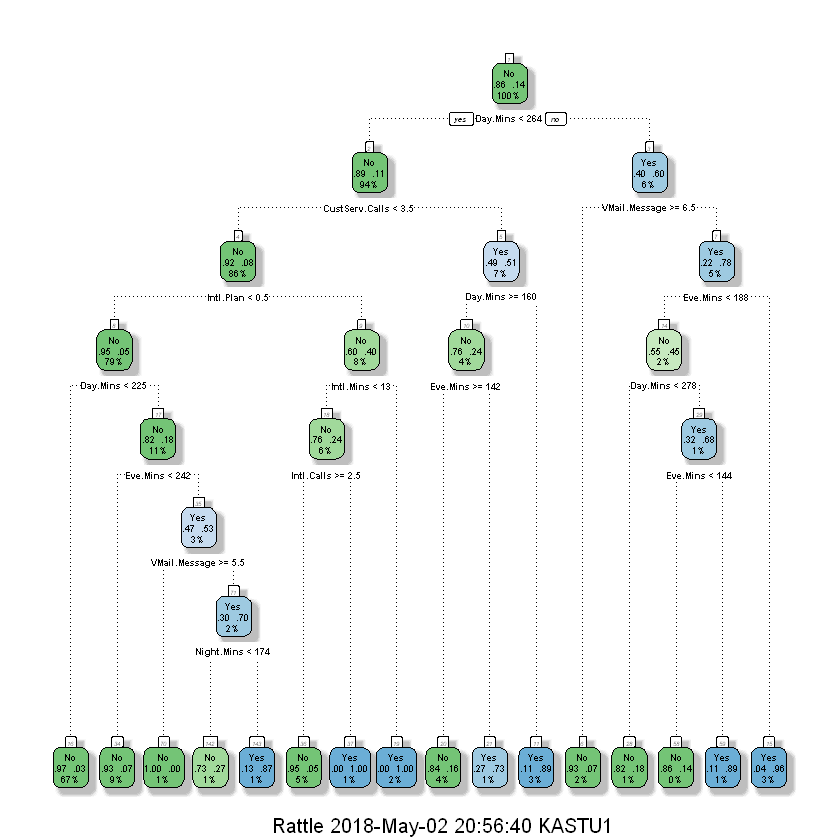

In [23]:
# Cart Model
churntree = rpart( Churn ~ ., data=train, method="class")
fancyRpartPlot(churntree)

In [30]:

test$pred = predict( churntree, newdata = test, type="class")
### [Performance on test]
table(test$Churn, test$pred)

precision = 67/78
recall = 67/(67+32)
f_1 = 2*precision*recall/(precision+recall)
print(precision)
print(recall)
print(f_1)


     
       No Yes
  No  557  11
  Yes  32  67

[1] 0.8589744
[1] 0.6767677
[1] 0.7570621


In [26]:
trainpred = predict( churntree, newdata = train, type="class")
### performance on train
table(train$Churn, trainpred)

     trainpred
        No  Yes
  No  2259   23
  Yes   97  287

In [31]:
### CP matrix to check the cp and relative error 
printcp(churntree)


Classification tree:
rpart(formula = Churn ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] CustServ.Calls Day.Mins       Eve.Mins       Intl.Calls     Intl.Mins     
[6] Intl.Plan      Night.Mins     VMail.Message 

Root node error: 384/2666 = 0.14404

n= 2666 

        CP nsplit rel error  xerror     xstd
1 0.092448      0   1.00000 1.00000 0.047213
2 0.080729      2   0.81510 0.83073 0.043641
3 0.055990      4   0.65365 0.66927 0.039685
4 0.018229      7   0.45312 0.46875 0.033738
5 0.013021     14   0.32552 0.44792 0.033033
6 0.010000     15   0.31250 0.41927 0.032030



Classification tree:
rpart(formula = Churn ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] CustServ.Calls Day.Mins       Eve.Mins       Intl.Calls     Intl.Mins     
[6] Intl.Plan      Night.Mins     VMail.Message 

Root node error: 384/2666 = 0.14404

n= 2666 

        CP nsplit rel error  xerror     xstd
1 0.092448      0   1.00000 1.00000 0.047213
2 0.080729      2   0.81510 0.83073 0.043641
3 0.055990      4   0.65365 0.66927 0.039685
4 0.018229      7   0.45312 0.46875 0.033738
5 0.013021     14   0.32552 0.44792 0.033033


     
       No Yes
  No  556  12
  Yes  32  67

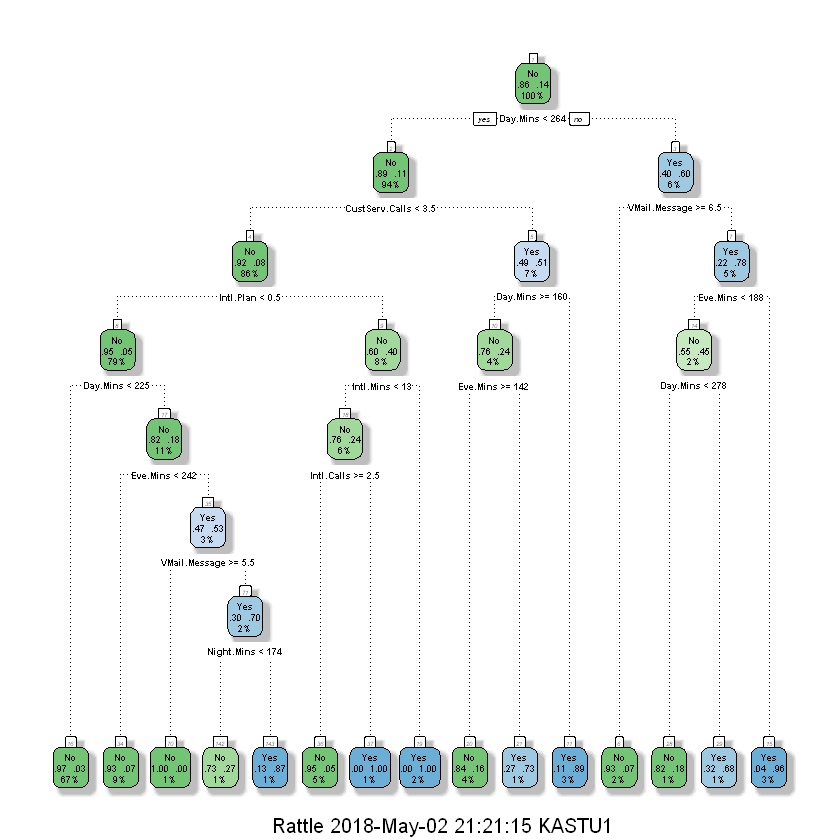

In [38]:

prunedtree = prune(churntree, cp = 0.013021)

printcp(prunedtree)

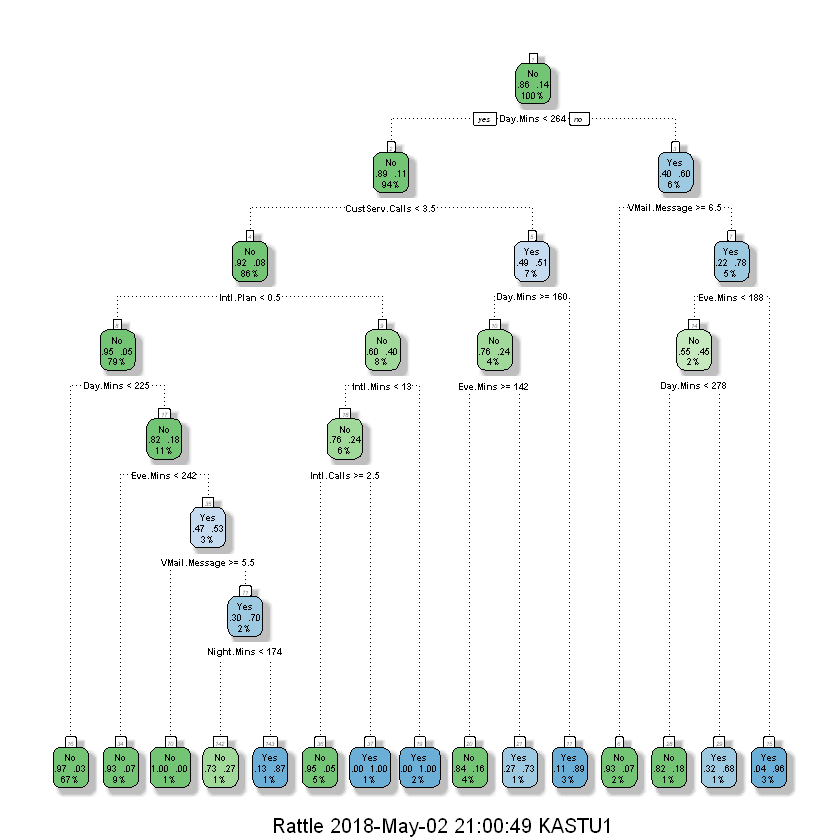

In [33]:
fancyRpartPlot(prunedtree)

In [34]:
printcp(prunedtree)


Classification tree:
rpart(formula = Churn ~ ., data = train, method = "class")

Variables actually used in tree construction:
[1] CustServ.Calls Day.Mins       Eve.Mins       Intl.Calls     Intl.Mins     
[6] Intl.Plan      Night.Mins     VMail.Message 

Root node error: 384/2666 = 0.14404

n= 2666 

        CP nsplit rel error  xerror     xstd
1 0.092448      0   1.00000 1.00000 0.047213
2 0.080729      2   0.81510 0.83073 0.043641
3 0.055990      4   0.65365 0.66927 0.039685
4 0.018229      7   0.45312 0.46875 0.033738
5 0.013021     14   0.32552 0.44792 0.033033


In [35]:
## performance of pruned tree 


test$pruned_pred = predict(prunedtree, newdata = test, type="class")


table(test$Churn, test$pruned_pred)

     
       No Yes
  No  556  12
  Yes  32  67

In [ ]:
### randomforest 

In [41]:
rftrees = randomForest(as.factor(Churn) ~ ., data=train )
test$pred_rf = predict(rftrees, newdata = test )
table(test$Churn, test$pred_rf)

     
       No Yes
  No  561   7
  Yes  30  69

In [43]:
precision = 69/76
recall = 69/(99)

F1_S=2*precision*recall/(precision+recall)
print(precision)
print(recall)
print(F1_S)

[1] 0.9078947
[1] 0.6969697
[1] 0.7885714


In [44]:

names(rftrees)

[1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"

In [45]:
rftrees$ntree

[1] 500

In [47]:
### parameter tuning of randomforest 
rftree2 = randomForest(as.factor(Churn) ~ ., data=train, ntree=40, mtry=5, classwt = c(0.7, 0.3), nodesize = 20  )

In [48]:
pred = predict(rftree2, newdata = test)

In [49]:
table(test$Churn, pred)

     pred
       No Yes
  No  552  16
  Yes  26  73

In [50]:
precision = 73/89
recall = 73/(99)

F1_S=2*precision*recall/(precision+recall)
print(precision)
print(recall)
print(F1_S)

[1] 0.8202247
[1] 0.7373737
[1] 0.7765957


[1] "call"            "type"            "predicted"       "err.rate"       
 [5] "confusion"       "votes"           "oob.times"       "classes"        
 [9] "importance"      "importanceSD"    "localImportance" "proximity"      
[13] "ntree"           "mtry"            "forest"          "y"              
[17] "test"            "inbag"           "terms"

[1] 40

,MeanDecreaseGini
Account.Length,20.20172
VMail.Message,20.10234
Day.Mins,93.59384
Eve.Mins,43.14696
Night.Mins,23.14299
Intl.Mins,29.01167
CustServ.Calls,77.13920
Intl.Plan,54.69207
VMail.Plan,15.71715
Day.Calls,20.05788


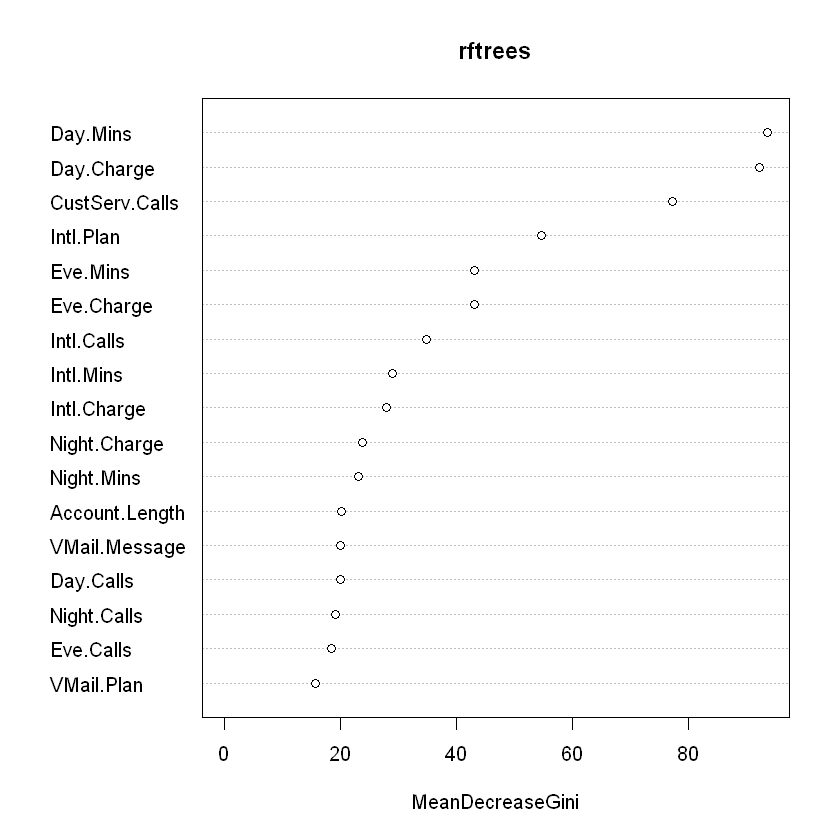

In [55]:
names(rftree2)
rftree2$ntree
importance(rftrees, decreasing = T)
varImpPlot(rftrees)